In [38]:
import json
import numpy as np
import matplotlib.pyplot as plt
from spg_overlay.utils.constants import DRONE_INITIAL_HEALTH
from collections import defaultdict


In [39]:
with open("benchmarks/res10.json", "r") as f:
    data = json.load(f)
print(f"{len(data)} items found")


60 items found


In [40]:
score_names = ["score","percent_rescued","score_timestep","score_health_returned","score_exploration","percent_drones_destroyed", "mean_drones_health"]

scores = {name:{} for name in score_names}
for d in data:
    for name in score_names:
        map_name = d["map_name"]+"\n"+d["zones"]
        if map_name not in scores[name]:
            scores[name][map_name] = []
        scores[name][map_name].append(d[name])
        
for map_name in scores["mean_drones_health"]:
    scores["mean_drones_health"][map_name] = [100*x/DRONE_INITIAL_HEALTH for x in scores["mean_drones_health"][map_name]]

In [41]:
for map_name in scores["score"]:
    print(map_name.replace('\n', '_'), len(scores["score"][map_name]))

MyMapFinal2022_23_no_com_zone 12
MyMapFinal2022_23_none 20
MyMapFinal2022_23_no_gps_zone 20
MyMapFinal2022_23_kill_zone 4
MyMapFinal_2023_24_01_none 4


In [42]:
def plot_score(scores, title:str):
    # Prepare data for boxplot
    keys = sorted(scores.keys()) 
    values = [scores[key] for key in keys]
    
    # Create the boxplot
    plt.figure(figsize=(10, 8))
    boxplot = plt.boxplot(values, labels=keys, patch_artist=True, showmeans=False, 
                          boxprops=dict(facecolor='skyblue', color='blue'),
                          whis=[0, 100])
    
    # Add labels and title
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0,100)
    
    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


Mean score: 75.81372415549417
Old score: 80.56522733009733


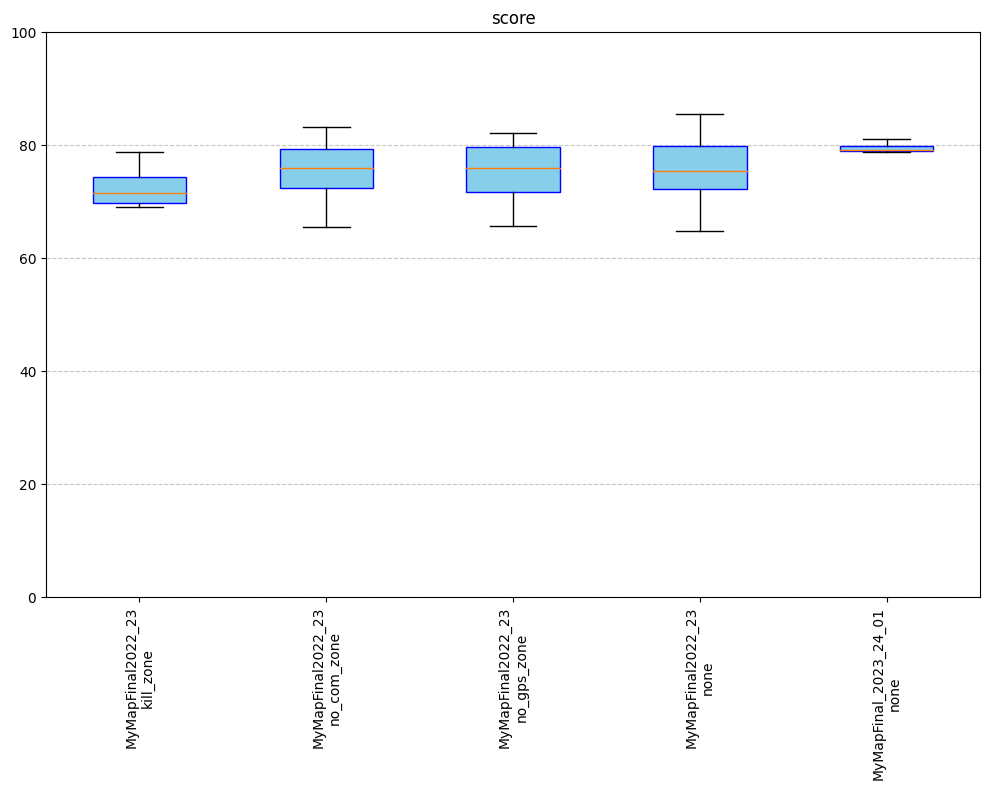

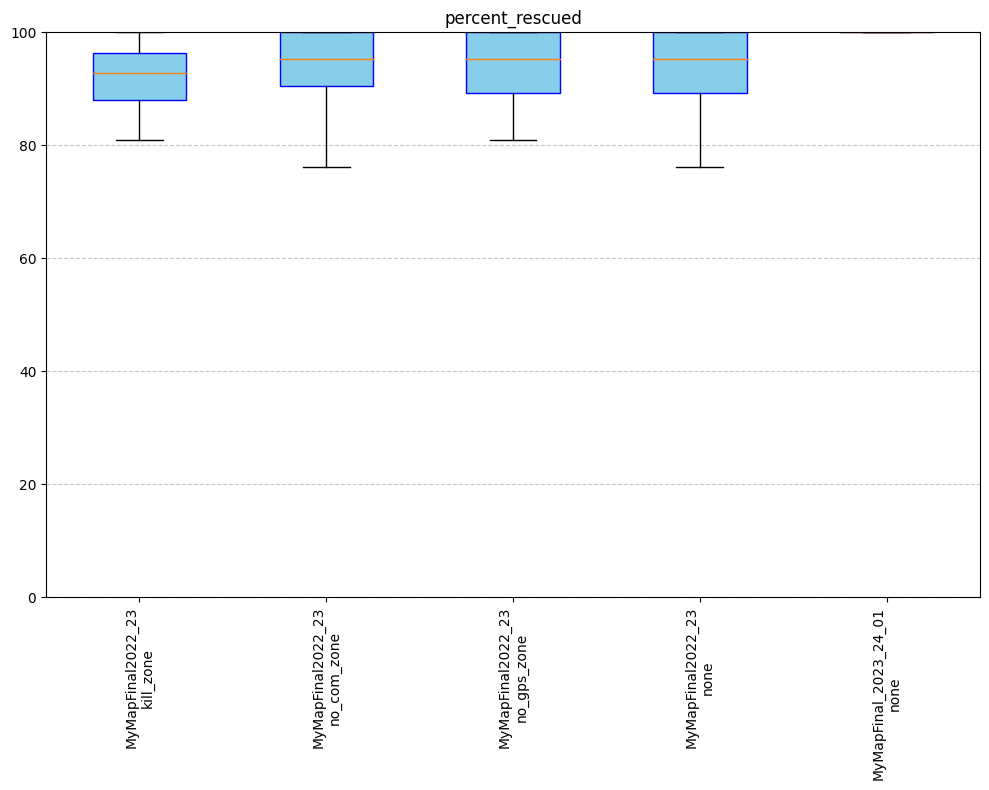

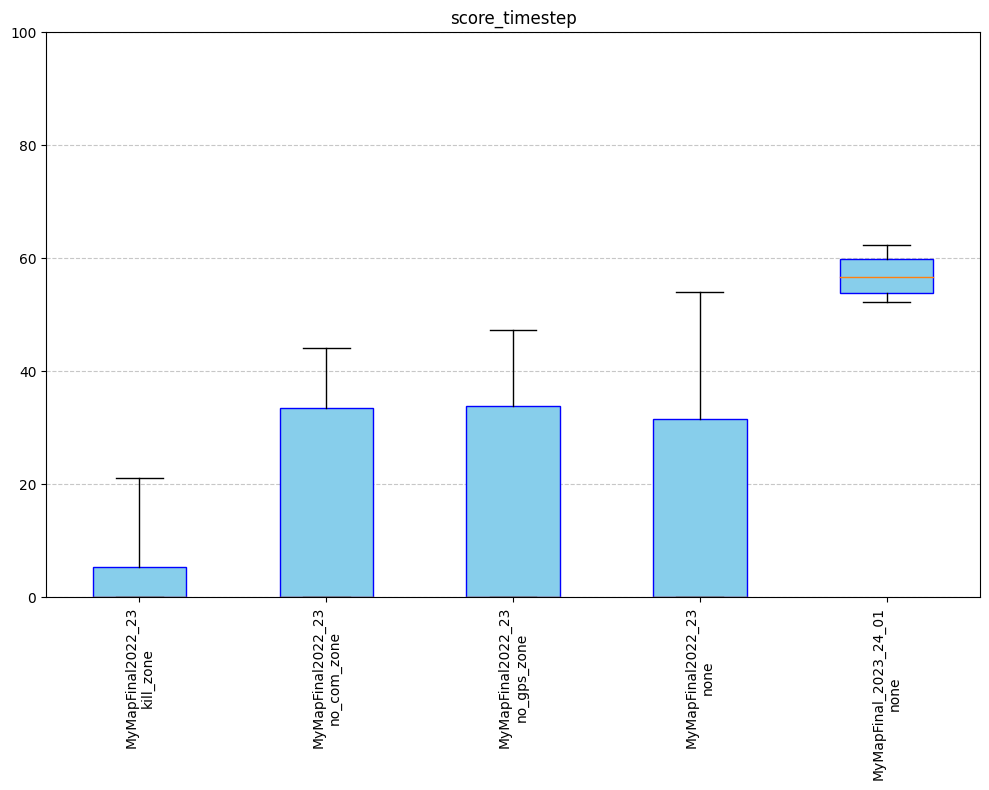

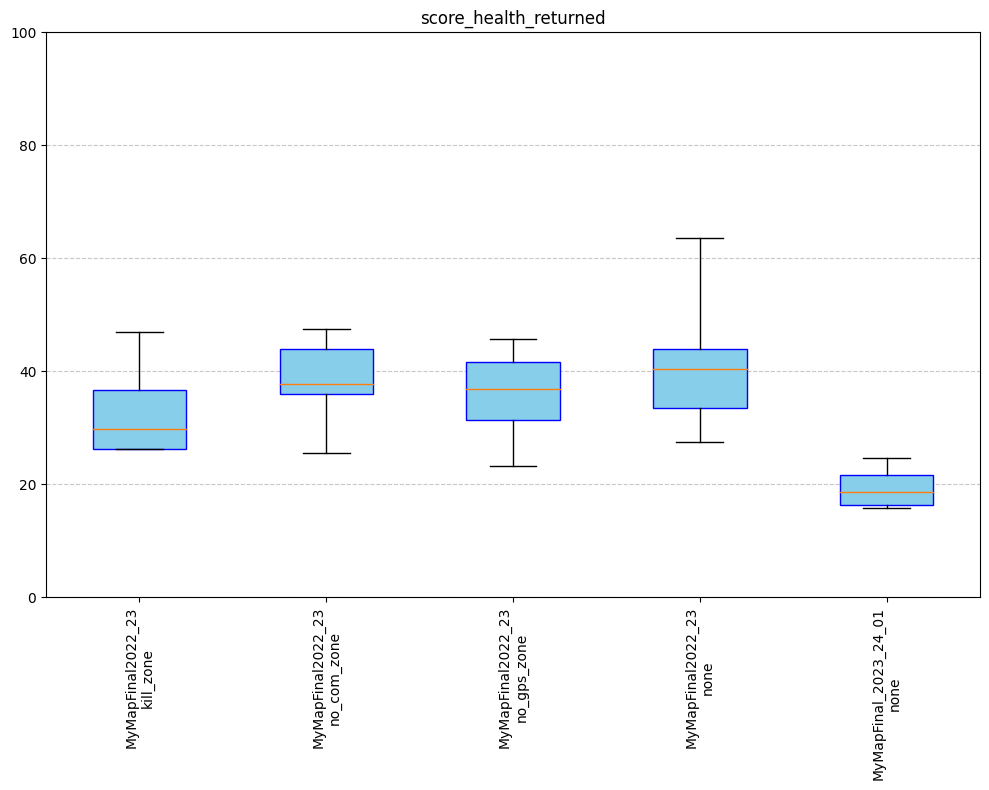

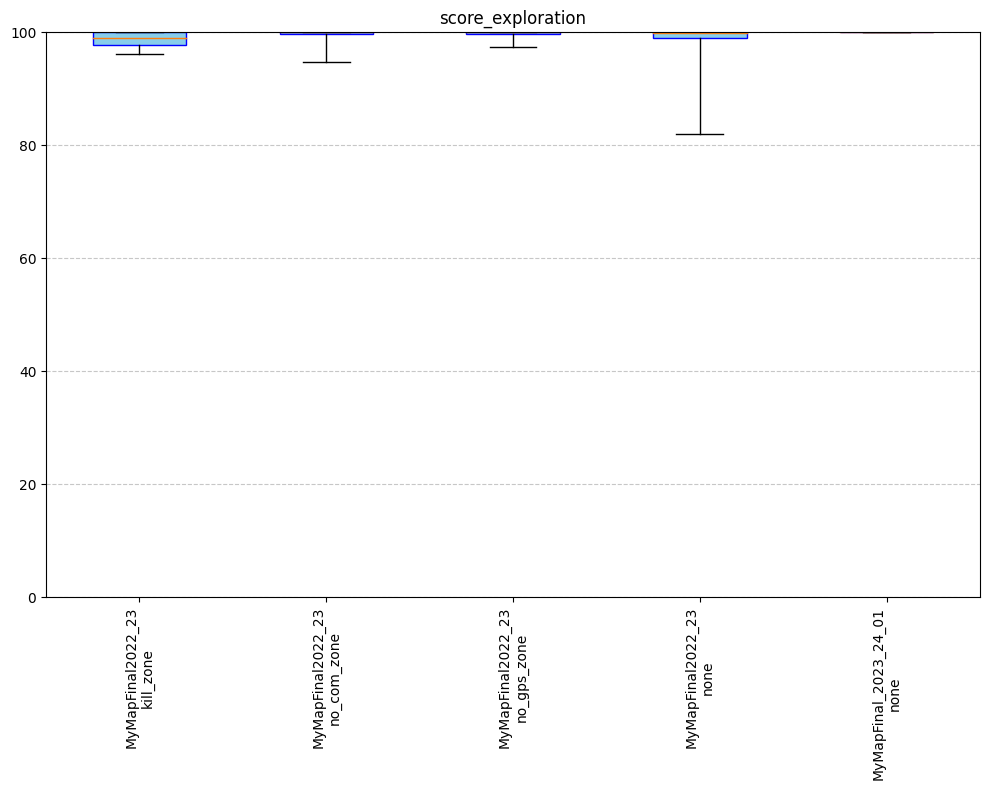

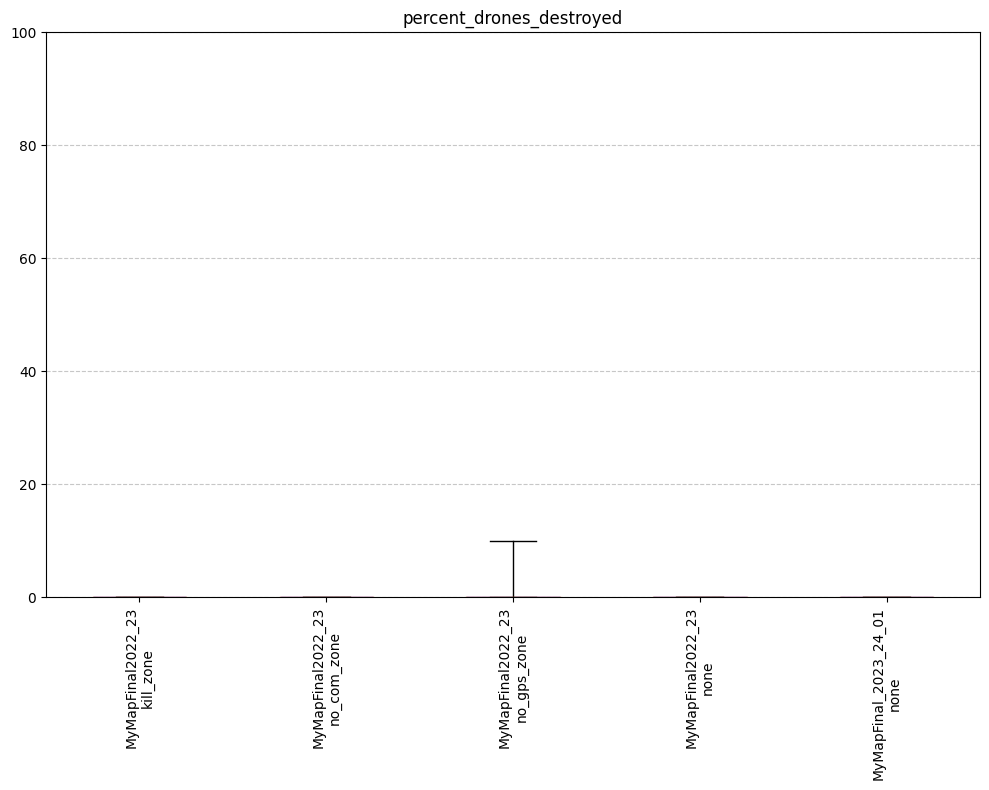

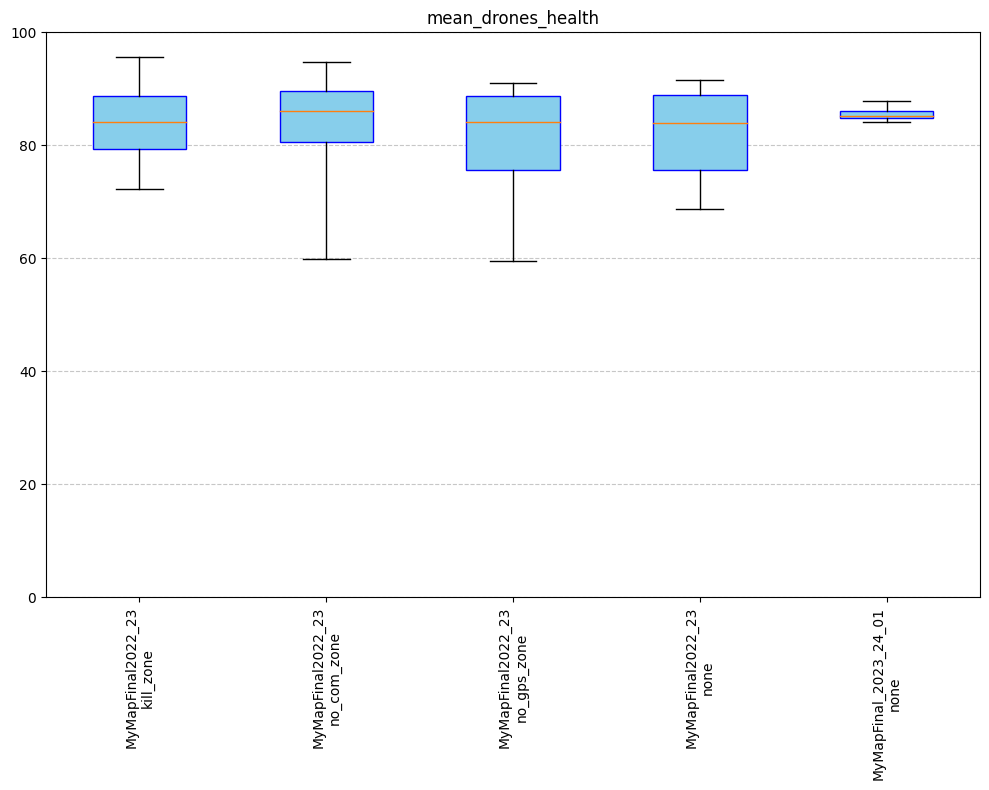

In [43]:
total_score = []
old_score = []
count = 0

for map_name in (scores["score"].keys()):
    if "22-23" in map_name:
        total_score.append(0.5*np.mean(scores["score"][map_name]))
        old_score.append(0.5*(0.6*np.mean(scores["percent_rescued"][map_name])+
                              0.2*np.mean(scores["score_exploration"][map_name])+
                              0.2*np.mean(scores["score_timestep"][map_name])))
        count += 0.5
    else:
        total_score.append(np.mean(scores["score"][map_name]))
        old_score.append(0.6*np.mean(scores["percent_rescued"][map_name])+
                              0.2*np.mean(scores["score_exploration"][map_name])+
                              0.2*np.mean(scores["score_timestep"][map_name]))
        count += 1
print("Mean score:",sum(total_score)/count)
print("Old score:",sum(old_score)/count)

for name in score_names:
    plot_score(scores[name], name)

In [44]:
grouped_data = defaultdict(list)
for entry in data:
    grouped_data[entry["map_name"]+"_"+entry["zones"]].append(entry)

# Find the 5 lowest scores for each map_name
result = {}
for map_name, entries in grouped_data.items():
    # Sort entries by score
    sorted_entries = sorted(entries, key=lambda x: x["score"])
    # Take the top 5 lowest scores
    lowest_scores = sorted_entries[:5]
    # Extract filename_video_capture
    result[map_name] = [entry["filename_video_capture"] for entry in lowest_scores]

# Print the result
print(json.dumps(result, indent=4))

{
    "MyMapFinal2022_23_no_com_zone": [
        "/home/infres/hverninas-22/results_swarm_rescue/team01_241222_13h18min56s/e9d41e6f-58d4-4022-80f8-b7c47761855f_map_MyMapFinal2022_23_zone_NO_COM_ZONE/videos/team01_MyMapFinal2022_23_no_com_zone.avi",
        "/home/infres/hverninas-22/results_swarm_rescue/team01_241222_13h18min56s/df1272fc-2a0f-45b0-b8ac-96227b9279a9_map_MyMapFinal2022_23_zone_NO_COM_ZONE/videos/team01_MyMapFinal2022_23_no_com_zone.avi",
        "/home/infres/hverninas-22/results_swarm_rescue/team01_241222_13h18min56s/b4d568a3-fd0d-4a13-840c-97d0e3e4a1ef_map_MyMapFinal2022_23_zone_NO_COM_ZONE/videos/team01_MyMapFinal2022_23_no_com_zone.avi",
        "/home/infres/hverninas-22/results_swarm_rescue/team01_241222_13h18min56s/84ce11a4-53e6-4fb7-be71-c738e1536312_map_MyMapFinal2022_23_zone_NO_COM_ZONE/videos/team01_MyMapFinal2022_23_no_com_zone.avi",
        "/home/infres/hverninas-22/results_swarm_rescue/team01_241222_13h18min56s/8e6f0135-bb85-4dd3-9662-56979ac46ef7_map_MyMa